In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import chomp_rules
import engine
import model
import train

In [2]:
engine.initialize_model("run1/models/model-001/")
engine.setup_evaluator()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from run1/models/model-001/model.ckpt


In [3]:
config = chomp_rules.ChompGameConfig(16, 16)

In [4]:
board = chomp_rules.ChompState.empty_board(config)

In [ ]:
board.apply_move((8, 8))

In [ ]:
print board

In [ ]:
def to_map(b):
    if hasattr(b, "evaluations"):
        del b.evaluations
    engine.global_evaluator.populate(b)
    result = np.zeros((16, 16))
    for move, v in b.evaluations.posterior.iteritems():
        result[move] += v
    return result

In [ ]:
plt.matshow(to_map(board))

In [6]:
mcts = engine.MCTS(board)

In [25]:
for _ in xrange(100):
    mcts.step()

In [26]:
_ = mcts.write_graph()

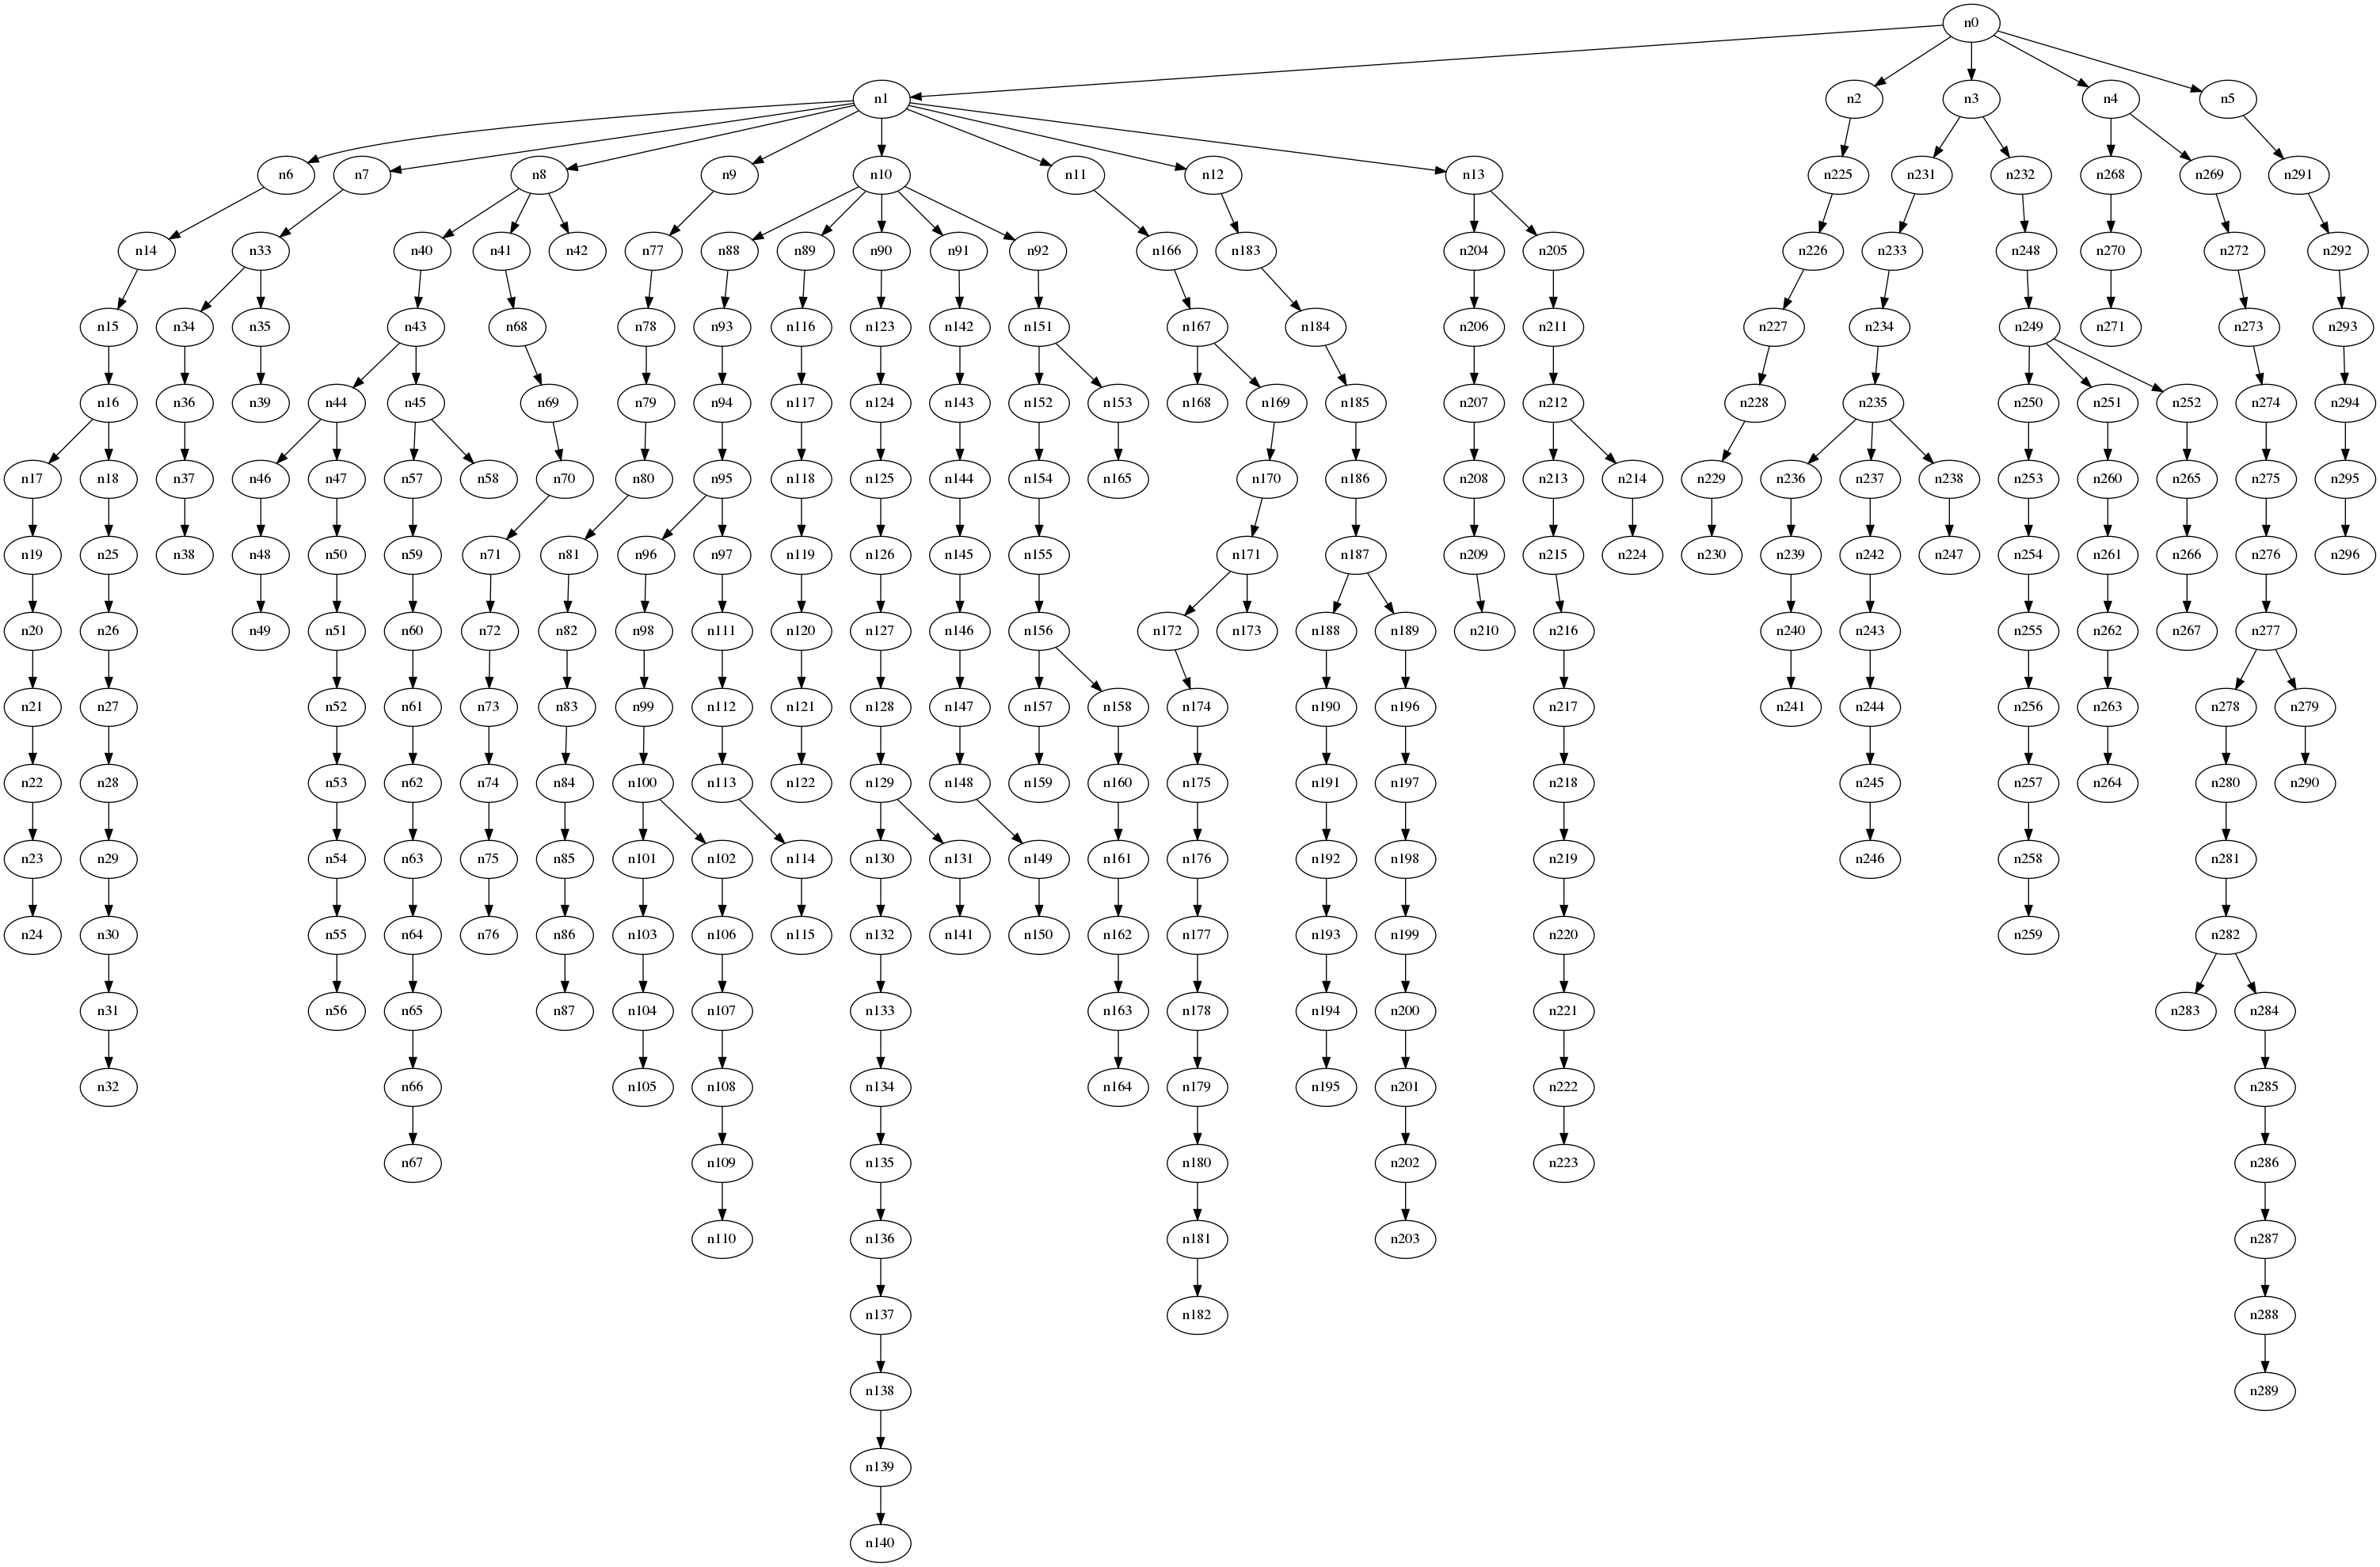

In [27]:
import os
from IPython.core.display import Image, display
os.system("dot -Tpng /tmp/mcts.dot -o /tmp/mcts.png")
display(Image("/tmp/mcts.png"))

## Working on MCTS

In [ ]:
engine.initialize_model("models/model-001.npy")
engine.setup_evaluator()

In [ ]:
board = ataxx_rules.AtaxxState.initial()
mcts = engine.MCTS(board)

In [ ]:
mcts.step()

In [ ]:
mcts.root_node.outgoing_edges.values()[0].get_edge_score()

In [ ]:
len(mcts.root_node.outgoing_edges)

## Working on the lack of value convergence.

In [ ]:
entries = train.load_entries(glob.glob("games/random-play/*.json"))

In [ ]:
s = [train.get_sample_from_entries(entries)[2][0] for _ in xrange(10000)]

In [ ]:
s.count(-1)

In [ ]:
np.var(s)

In [ ]:
sample = train.get_sample_from_entries2(entries)

plt.matshow(sample[0][0][:,:,1] - sample[0][0][:,:,2])

In [ ]:
sample[1:]

In [ ]:
ent_ind = 190
ply_ind = 123
entry = entries[ent_ind]
to_move = 1 if ply_ind % 2 == 0 else 2
board = ataxx_rules.AtaxxState(entry["boards"][ply_ind], to_move=to_move)
arr = engine.board_to_features(board)
plt.matshow(arr[:,:,1] - arr[:,:,2])
print board

In [ ]:
print sample[4]

## Padding.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.